# Data Driven Analysis of Supplier Efficiency and Shipping Costs 


## Datacard

## Data set selection

> In this section, you will need to provide the following information about the selected data set:
>
> - Source with a link
https://data.world/markbradbourne/rwfd-real-world-fake-data/workspace/file?filename=Supply+Chain.xlsx

> - Fields
This dataset includes 7 different sheets. 
- Sheet: OrderList KeyFields: Order ID, Order Date, Origin Port, Carrier, TPT, Service Level, Ship ahead day count, Ship late day count, Customer,
Product ID, Plant Code, Destination Port, Unit Quantity, Weight
- Sheet: FreightRates KeyFields: Carrier, origin_port_cd, dest_port_cd, minm_wgh_qty, svs_cd, minimum cost, rate, mode_dsc, tpt_day_cnt, carrier type
- Sheet: WhCosts KeyFields: WH, Cost/Unit
- Sheet: WhCapabilites Keyfields: Plant ID, Daily Capacity
- Sheet: ProductsPerPlant Keyfieds: Plant Code, Product ID
- Sheet: VimiCustomers KeyFields: Plant Code, Customers
- Sheet: PlantPorts KeyFields: Plant Code, Port

> - License
The Real World Fake Data collection is available for education and non-commerical use. 

### Data set selection rationale

> Why did you select this data set?
- I choose this dataset because it provides realistic stimulated supply chain data that is easy to work with anaylsis and visualization. It will allow
me to explore how different parts of a supply chain affect delivery cost and delivery time. Evevn though the data is not real, it still reflects real business like situations and can help show data analysis can improve effciency and decision-making. 

### Questions to be answered

> Using statistical analysis and visualization, what questions would you like to be able answer about this dataset.
> This could include questions such as:
>
> - What is the relationship between X and Y variables?
> - What is the distribution of the variables?
> - What is the relationship between the variables and the target?
>   You will need to frame these questions in a way to show value to a stakeholder (i.e.why should we know about the relationship between X and Y variables?)

Questions: 
- Which Suppliers have the highest average lead times and shipping costs?
**Helps identify potential improvement areas for supplier performance

- Is there a measureable relationship between order quantity and total shipping cost?
**Determines whether larger orders produce cost savings

- How do delivery times vary across different regions or transport modes?
**Reveals problem areas in certain regions or shipping routes that cause delays and raise costs

- What trends exist in total delivery volumes sand average shipping costs over time?
**Shows how demand and work levels rise or fall during different times of the year

- Do busier warehouses have higher operating costs?
**Examines how changes in warehouse uses affect costs and overall efficeincy 

### Visualization ideas

> Provide a few examples of what you plan to visualize to answer the questions you posed in the previous section. In this project, you will be producing 6-8 visualizations. You will also be producing an interactive chart using Plotly.

-  bar chart: showing supplier vs. average lead time which would compare supplier effiency and highlight outliers
- heatmap: region vs. average shipping cost which would examine correlation and scaling effects
- line chart: month vs. (total deliveries, average cost) which would demonstrate seasonal trends
- boxplot: warehouse utilization vs. variable cost which would show cost variability across capacity levels
- historgram: lead times vs. number of orders showing delivery times spread across all orders
- interactive plotly dashboard: supplier and region filters, can explore delivery times and shipping costs by supplier or region

> Think about what those visualization could be: what are the variables used in the charts? what insights do you hope to gain from them?
- Each visualization will focus on showing how costs, delivery times, and performance differ across suppliers, regions, and time. The charts will use variables such as supplier name, region, shipping cost, lead time, and order quantity. From these visuals, I hope to identify which suppliers or regions are less efficient, find patterns in delivery times, and see how costs change with order size or season. 


In [1]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_excel("/Users/diyapatel/Desktop/SupplyChain.xlsx")
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())

       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   8

## Loading and File I/O

Here I define a function that safely loads my Excel file from the 'data' folder.  It uses a 'try/except' block
to handle missing files or bad sheets in a graceful manner


In [2]:
from pathlib import Path


def load_excel(path: Path, sheet: str) -> pd.DataFrame:
  """Load an Excel file from the given path and sheet name.

  Args:
      path (Path): The path to the Excel file.
      sheet (str): The name of the sheet to load.

  Returns:
      pd.DataFrame: The loaded DataFrame.
  """
  try:
    df = pd.read_excel(path, sheet_name=sheet)
    return df
  except FileNotFoundError:
    print(f"Error: The file at {path} was not found.")
    return pd.DataFrame()
  except ValueError:
    print(f"Error: The sheet '{sheet}' does not exist in the Excel file.")
    return pd.DataFrame()


df = load_excel(Path("data/SupplyChain.xlsx"), "OrderList")
print(df.head())

       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   8

## Simplified Exploratory Data Analysis (EDA)

Here I use built-in Python data structures in realistic ways. A set finds unqiue carriers, a dictionary maps region
names, and a list/tuple store the numeric variables for later analysis. 

In [ ]:
def create_numeric_list() -> list[str]:
  """
  Create a list of numeric columns to analyze.

  Returns:
      list[str]: Names of numeric columms used for calculations.
  """
  return ["Unit quantity", "Weight"]


def create_correlation_pair() -> tuple[str, str]:
  """
  Create a tuple of column names to analyze correlation.

  Returns:
      tuple[str, str]: Column names for correlation testing .
  """
  return ("Unit quantity", "Weight")


def get_unique_carriers(dataframe: pd.DataFrame) -> set[str]:
  """ 
  Find all unique carriers within dataset.

  Args: 
       dataframe (pd.DataFrame): The supply chain dataset.

  Returns: 
       set[str]: A set of unique carrier names.
  """
  return set(dataframe["Carrier"])


def add_region_mapping(order_df: pd.DataFrame, freight_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
  """
  Map port codes to human-readable region names for both order and freight datasets.

  Args:
      order_df (pd.DataFrame): The order dataset.
      freight_df (pd.DataFrame): The freight dataset.

  Returns:
      pd.DataFrame: The updated order and freight datasets with region mappings.
  """
  region_map = {
      "PORT09": "REGION A",
      "PORT02": "REGION B",
      "PORT03": "REGION C",
      "PORT04": "REGION D",
      "PORT05": "REGION E",
  }

  order_df["orgin_region"] = order_df["Origin Port"].map(
      region_map).fillna("UNKNOWN")
  order_df["dest_region"] = order_df["Destination Port"].map(
      region_map).fillna("UNKNOWN")

  freight_df["origin_region"] = freight_df["orig_port_cd"].map(
      region_map).fillna("UNKNOWN")
  freight_df["dest_region"] = freight_df["dest_port_cd"].map(
      region_map).fillna("UNKNOWN")

  return order_df, freight_df


numeric_columns = create_numeric_list()
correlation_pair = create_correlation_pair()
unique_carriers = get_unique_carriers(df)
print(f"Number of unique carriers: {len(unique_carriers)}")

order_df, freight_df = add_region_mapping(df, freight_df)
order_df.head

Number of unique carriers: 3


<bound method NDFrame.head of           Order ID Order Date Origin Port Carrier  TPT Service Level  \
0     1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1     1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2     1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3     1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4     1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
...            ...        ...         ...     ...  ...           ...   
9210  1.447305e+09 2013-05-26      PORT04  V444_1    1           DTD   
9211  1.447319e+09 2013-05-26      PORT04  V444_1    1           DTD   
9212  1.447322e+09 2013-05-26      PORT04  V444_1    1           DTD   
9213  1.447145e+09 2013-05-26      PORT04  V444_1    1           DTD   
9214  1.447328e+09 2013-05-26      PORT04  V444_1    1           DTD   

      Ship ahead day count  Ship Late Day count           Customer  \
0                        3         

This step applies a vectorized calculation using numpy and pandas to find the weightt per shipped unit for each order. Vectorization makes the operation effieicient by applying the math to entire columns at once. 

In [50]:


# Calculate weight per unit for each order
df['Weight per Unit'] = df['Weight'] / df['Unit quantity']

# check result
df[['Weight', 'Unit quantity', 'Weight per Unit']].head()

,Weight,Unit quantity,Weight per Unit
0,14.30,808,0.017698
1,87.94,3188,0.027585
2,61.20,2331,0.026255
3,16.16,847,0.019079
4,52.34,2163,0.024198


The groupby function used aggregates shipment data by carrier, giving the mean, standard deviation, and sample count of weight per unit. This will highlight which carriers typically handle heavier or lighter shipments.

In [38]:
# Summarize average weight per unit by carrier

carrier_summary = (
    df.groupby('Carrier')['Weight per Unit']
    .agg(['mean', 'std', 'count'])
    .reset_index()

)

carrier_summary.head()

,Carrier,mean,std,count
0,V444_0,0.014207,0.098897,6264
1,V444_1,0.018393,0.023451,2097
2,V44_3,0.019628,0.044718,854


Here I join the order-level dataset with the freight rate table to enhance each record with rate and mode information. The left merge ensures every order details are keeps its detials even if freight info is missing. 

In [37]:
# Load the Freight Rate table

freight_df = pd.read_excel("data/SupplyChain.xlsx", sheet_name="FreightRates")

# Merge by common column 'Carrier'

merged = df.merge(freight_df, on='Carrier', how='left')

merged.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,...,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The pivot table was intended to summarize the average weight per unit by month. However, after closley inspecting the data, I realized that the order date columns contains only a single unique data which is 2013-05-26.
Because of this, the table only shows one row of data instead of a full monthly time series. This is most likely due to the fact that the dataset is simulated. I will replace this visualization with a carrier or region trend comparison,
to explore operational patterns instead. 

In [40]:
# Convert order dates to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Average weight per unit by month pivot table
monthly_weight = df.pivot_table(
    values='Weight per Unit',
    index=df['Order Date'].dt.to_period('M'),
    aggfunc='mean'
).reset_index()


monthly_weight.rename(columns={'Order Date': 'Month'}, inplace=True)
monthly_weight.head()

,Month,Weight per Unit
0,2013-05,0.015662


Orignally, the pivot table above was supposed to summarize average weight per month to visualize monthly shipping trends. Since a time-series analysis would not provide any insight, I created a new pivot table to summarize total shipments handled by each carrier. This summary supports a carrier trend comparison.

In [9]:
# Summarize total shipments by carrier pivot table

carrier_trend_pivot = (
    df.pivot_table(
        values="Order ID",
        index="Carrier",
        aggfunc="count"
    )
    .reset_index()
    .rename(columns={"Order ID": "Total Shipments"})
    .sort_values(by="Total Shipments", ascending=False)

)

carrier_trend_pivot.head()

,Carrier,Total Shipments
0,V444_0,6264
1,V444_1,2097
2,V44_3,854


This pivot table calcuates the average lead time (TPT) for each carrier. It helps identify which carriers have the longest or shortest average delivery times. 

In [41]:
# Analyze TPT by carrier

supplier_pivot = (
    df.pivot_table(
        values='TPT',
        index='Carrier',
        aggfunc='mean'
    )
    .reset_index()
    .sort_values(by='TPT', ascending=False)
)

supplier_pivot.head()

,Carrier,TPT
0,V444_0,1.998404
2,V44_3,1.289227
1,V444_1,1.053887


Below is a pivot table that summarizes the average weight per unit by region and carriers. It helps visualize how shipment efficiency differs across regions and suppliers. Each cell represents the average shipment weight handled
by a specific carrier in a specific region. 

In [ ]:
# Analyze weight per unit by region and carrier

region_carrier_pivot = (
    df.pivot_table(
        values='Weight per Unit',
        index='orgin_region',
        columns='Carrier',
        aggfunc='mean'
    )
    .round(3)
)

region_carrier_pivot.head()

Carrier,V444_0,V444_1,V44_3
orgin_region,,,
REGION A,0.389,NaN,0.104
REGION D,0.012,0.018,0.003
REGION E,NaN,NaN,0.006


To analyze warehouse efficiency and cost variability, I merged two related sheets, WhCosts and WhCapacities. By merging these two sheets on their shared warehouse/plant code I can compare warehouse utilization against
variable operating costs. 

In [12]:
# Merge warehouse cost and capacity sheets

wh_costs = pd.read_excel("data/SupplyChain.xlsx", sheet_name="WhCosts")
wh_capacities = pd.read_excel(
    "data/SupplyChain.xlsx", sheet_name="WhCapacities")

warehouse_merged = wh_costs.merge(
    wh_capacities, left_on="WH", right_on="Plant ID")

warehouse_merged["Capacity Group"] = pd.cut(
    warehouse_merged["Daily Capacity "], bins=[0, 100, 500, 1100],
    labels=["Small (0-100)", "Medium(100-500)", "Large(500+)"]
)
warehouse_merged.head()

,WH,Cost/unit,Plant ID,Daily Capacity,Capacity Group
0,PLANT15,1.415063,PLANT15,11,Small (0-100)
1,PLANT17,0.428947,PLANT17,8,Small (0-100)
2,PLANT18,2.036254,PLANT18,111,Medium(100-500)
3,PLANT05,0.488144,PLANT05,385,Medium(100-500)
4,PLANT02,0.477504,PLANT02,138,Medium(100-500)


This bar char shows the average delivery lead time (TPT) for each supplier. It helps identify which suppliers consistently have longer shipping times, which can indicate efficiency issues or potential delays.
The bar height represents have average lead time in days. Suppliers with taller bars are less efficient, while shorter bars indicate faster performance. I used a bar chart because it clearly compares suppliers against lead time, making
it easy to spot outliers or inefficiencies. From a business perspective, the results suggest that one supplier, V444_0, is consistently slower than the others. Addressing these delays through improved logistics coordination or contract adjustments could enhacnce overalll supply chain reliability. 

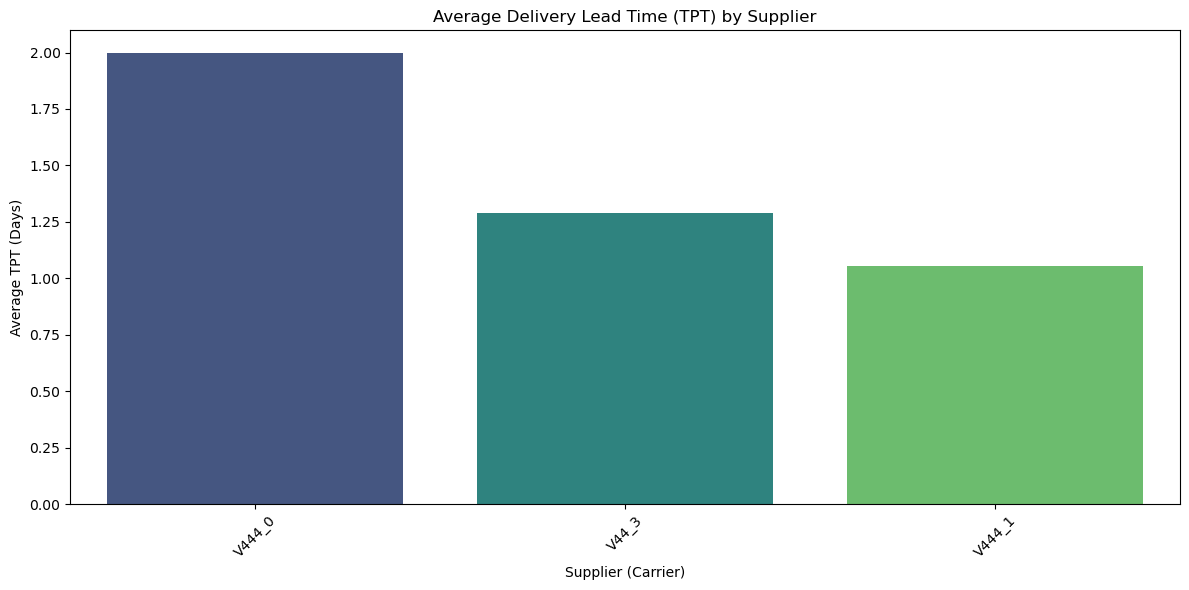

In [13]:


# Bar chart showing average TPT by supplier

plt.figure(figsize=(12, 6))
sns.barplot(data=supplier_pivot, x='Carrier',
            y='TPT', hue="Carrier", palette='viridis')
plt.title('Average Delivery Lead Time (TPT) by Supplier')

plt.xlabel('Supplier (Carrier)')
plt.ylabel('Average TPT (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This heatmap shows the average shipping cost across different regions and carriers. Darker colors indicate higher average costs, while lighter shades represent lower costs. By visualizing the data thos way, it's easy to spot which region-
supplier combinations tend to be more expensive or efficient. Region A stands out with the highest aberage cost per unit, suggesting that shipments from this area may involve longer distances or higher handling expenses. Focusing on optimizing region A could yield the potential cost savings across the network. 

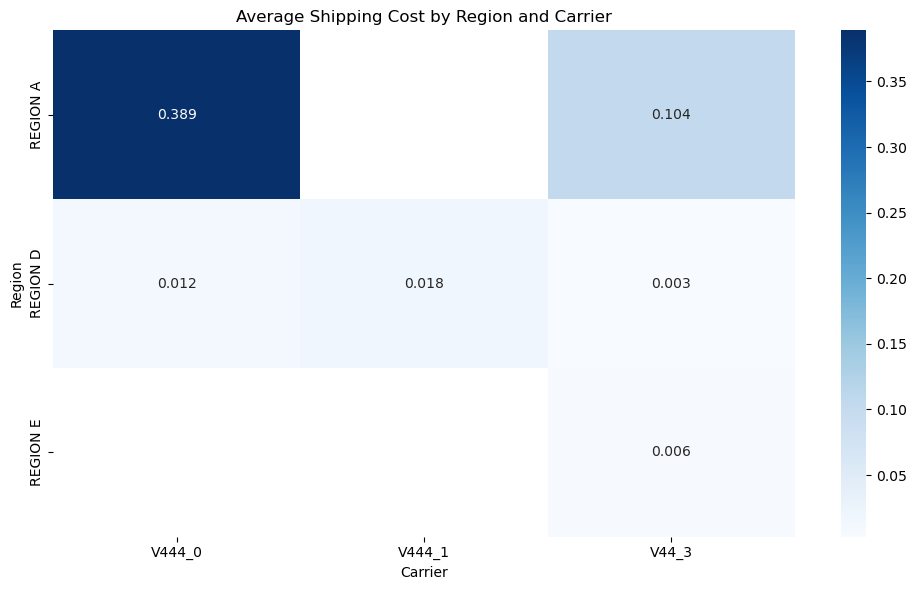

In [60]:
# Heatmap of average shipping cost by region and carrier

plt.figure(figsize=(10, 6))
sns.heatmap(region_carrier_pivot, annot=True, fmt=".3f", cmap='Blues')

plt.title('Average Shipping Cost by Region and Carrier')
plt.xlabel('Carrier')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

Instead of the line chart, this bar chart uses the the pivot table to compare total shipment volumes by carrier. It reveals which suppliers handle more orders, reflecing operational workload and performance patterns. I chose the bar chart because it provides clear and direct comparison between carriers and makes it easy to tell which one handles the largest share of shipments. The results sjow that Carrier V444_0 handles the majority of total shipments, suggesting it is the primary logistics partner and a potential bottleneck if demand increases. 

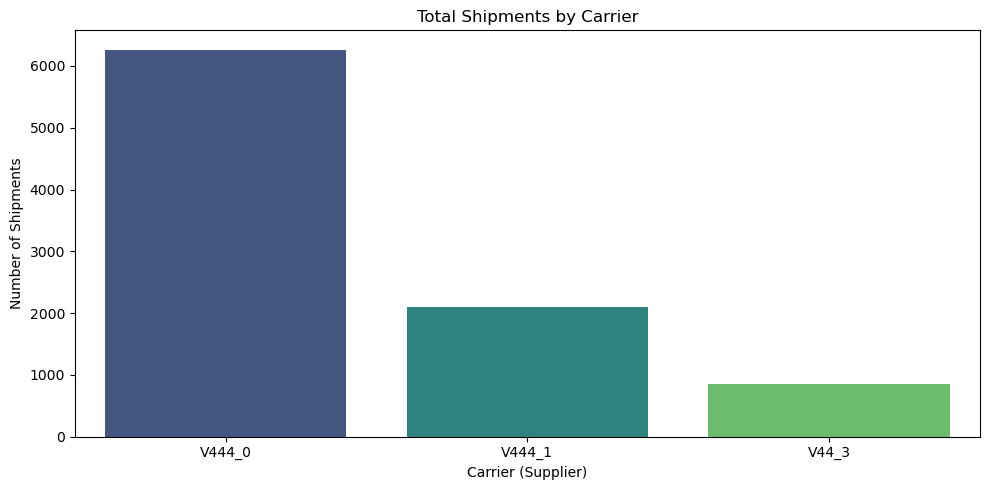

In [15]:
# Bar chart of total shipments by carrier

plt.figure(figsize=(10, 5))
sns.barplot(data=carrier_trend_pivot, x='Carrier',
            y='Total Shipments', hue="Carrier", palette='viridis')
plt.title('Total Shipments by Carrier')

plt.xlabel('Carrier (Supplier)')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

This line was originally intented to visualize avg shipping weight per unit over time to identify monthly trends. Since there is only date in the dataset, there is no meaningful trend to present. If this dataset had included multiple months or years of order dates, the visualization could have shown patterns such as: seasonal peaks, changes in avg shipping weight across months, and performance changes. The line chart was included just to show the downside of using time-based visualizations. 

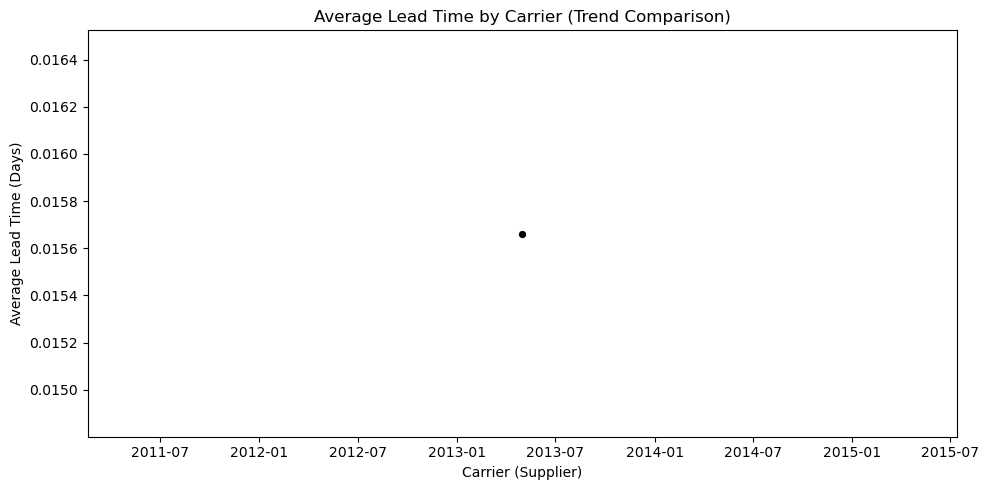

In [16]:
# Line chart of average shipping costs per unit by month
monthly_weight['Month'] = monthly_weight['Month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_weight, x="Month",
             y="Weight per Unit", marker="o", color="black")
plt.title("Average Lead Time by Carrier (Trend Comparison)")

plt.xlabel("Carrier (Supplier)")
plt.ylabel("Average Lead Time (Days)")
plt.tight_layout()
plt.show()

This boxplot compares daily capacity with cost per unit across different warehouses. Each box shows how much the cost per unit flucuates for warehouse with a given capacity levels. Wider boxes indicate greater cost variability, while
narrow boxes show more consistent performance. This visualization helps assess whether larger or busier warehouses tend to havee higher operating costs. The results suggest that while medium-capacity warehouses show slightly more variation in cost, there is no strong upward tend between capacity and cost per unit. For stakeholder, this implies that expanding warehouse capacity may not significantly increase per-unit operating costs, supporting scalability without major efficiency losses. 

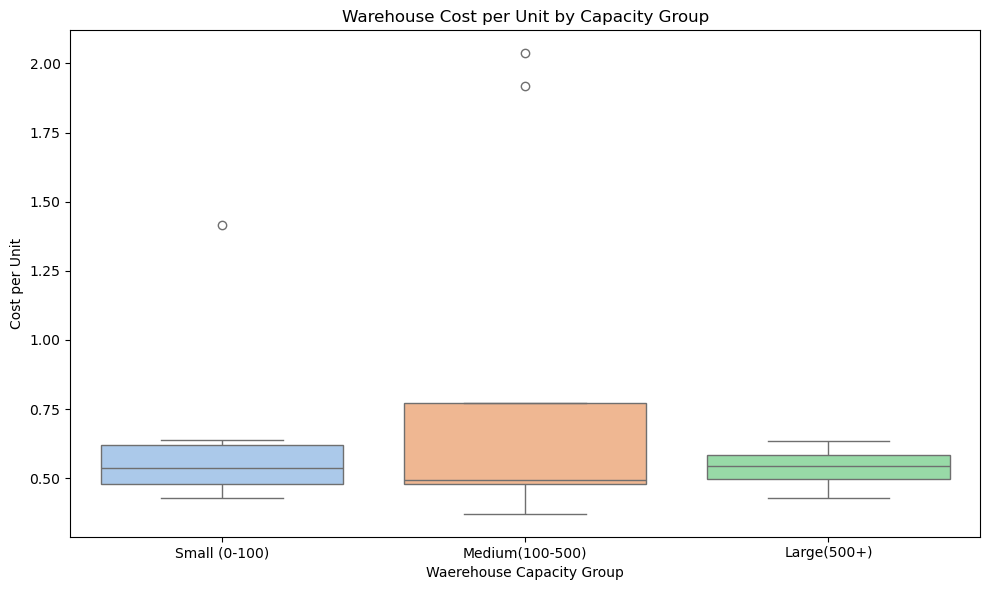

In [61]:
# Boxplot of daily capacity vs cost per unit by warehouse

plt.figure(figsize=(10, 6))
sns.boxplot(data=warehouse_merged, x="Capacity Group",
            y="Cost/unit", hue="Capacity Group", palette='pastel')
plt.title('Warehouse Cost per Unit by Capacity Group')
plt.xlabel('Waerehouse Capacity Group')
plt.ylabel('Cost per Unit')
plt.tight_layout()
plt.show()

This histogram shows how lead times are distributed across all customer orders. Each bar represents the number of orders that fall within a specific delivery-time range, while the KDE curve highlights the overall shape of distribution. Most deliveries cluster between 1-2 days, with very few delayed shipments, indicating a consistently efficient supply chain. I chose a histogram because it clearly shows how frequently different lead-time values occour, making it easy to identify patterns and outliers. This confirms that delivery operations are stable and predictable, with minimal late-order risk. 


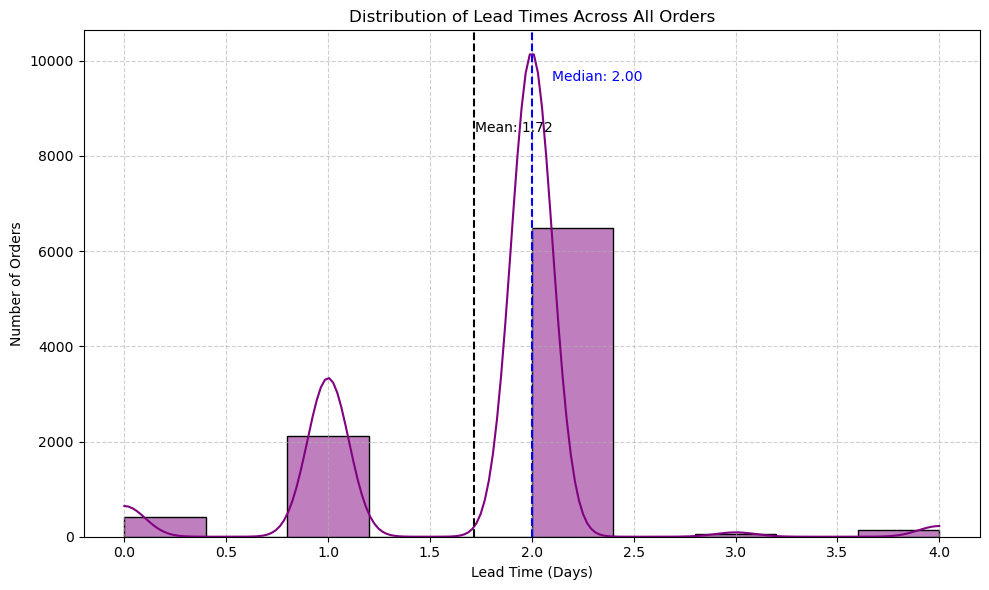

In [79]:
# Histogram of lead time distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TPT', bins=10, kde=True, color='purple')
median_val = df['TPT'].median()
mean_val = df['TPT'].mean()
plt.axvline(median_val, color="Blue", linestyle='--',
            label=f'Median: {median_val:.2f}')
plt.axvline(mean_val, color="black", linestyle='--',
            label=f'Mean: {mean_val:.2f}')
plt.text(median_val + 0.1, plt.ylim()[1]*0.9,
         f'Median: {median_val:.2f}', color='Blue')
plt.text(mean_val + 0.001, plt.ylim()[1]*0.8,
         f'Mean: {mean_val:.2f}', color='black')


plt.title('Distribution of Lead Times Across All Orders')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This multi-panel figure compares the distribution of lead times for each supplier. Each panel represents one carrier, showing how consistent their delivery performance is. Suppliers with narrow, concentrated histograms tend to deliver more reliably, while wider suggest greater variability. I used a multi-panel layout to make it easier to compare each supplier on the same scale. The visualization highlights that most carriers operate with consistent lead tines, while a few exhibit wider spreads, suggesting uneven delivery performance that may warrant closer evalution

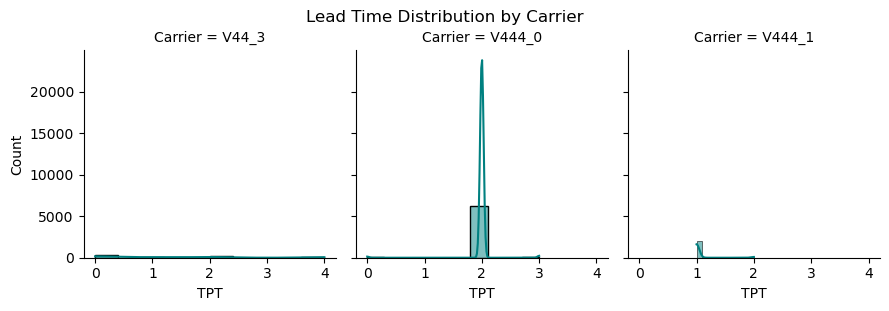

In [63]:
# Multi-panel histogram of lead time distribution by carrier

g = sns.FacetGrid(df, col="Carrier", col_wrap=3,
                  height=3, sharex=True, sharey=True)
g.map(sns.histplot, "TPT", bins=10, color='teal', kde=True)
g.fig.suptitle('Lead Time Distribution by Carrier', y=1.02)
plt.show()

This interactive Plotly chart allows users to explore delivery performance across suplliers and regions. Each point represents a shipment, with its position showing the delivery lead time and shipping cost per unit. Most shipments cluster within the 1-2 day lead-time range, suggesting consistent delivery performance across routes. However, a few outlier routes with higher costs or longer time may indicate capacity limits or inefficiencies that could be optimized. The interactivity allows users to hover over points for carrier specific details and zoom in on regions of interest, allowing to explore route performance patterns.

In [70]:
import plotly.express as px

fig = px.scatter(
    df,
    x="TPT",
    y="Weight per Unit",
    color="orgin_region",
    hover_name="Carrier",
    title="Interactive Dashboard: Delivery Time vs. Shipping Cost by Supplier and Region",
    labels={
        "TPT": "Lead Time (Days)",
        "Weight per Unit": "Shipping Cost per Unit",
        "origin_region": "Origin Region",
        "dest_region": "Destination Region",
    },
)

fig.update_layout(
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
    legend_title="Region Codes",
    template='plotly_white'
)

fig.show()

Goal: Characterize the distribution of delivery lead time to understand variability and detect outliers. 

Method: Use histrogram with a KDE (kernal density estimate) and boxplot
Report mean, median, standard deviation, skewness, and outliers using the IQR method. 

Here I examine the distribution of delivery lead time (TPT) to identify whether most shipments are delivered quickly or if a few delayed orders inflate the average. This histogram shows that most deliveries occour within a day or two with a peak around day 2. The KDE curve confirms this concentration. The boxplot shows a few outliers on the higher end (around 4 days), which could be due to delayed shipments. The mean and median are close, suggesting a roughly symmetrical distribution. The slight negative skew (-.39) indicates that a few shipments are delivered faster than average, which pulls the tail slightly to left. The standard deviation and IQR show moderate variability, meaning most deliveries occour within a consistent time window. The boxplot confirms this because there is only one visible outlier. 

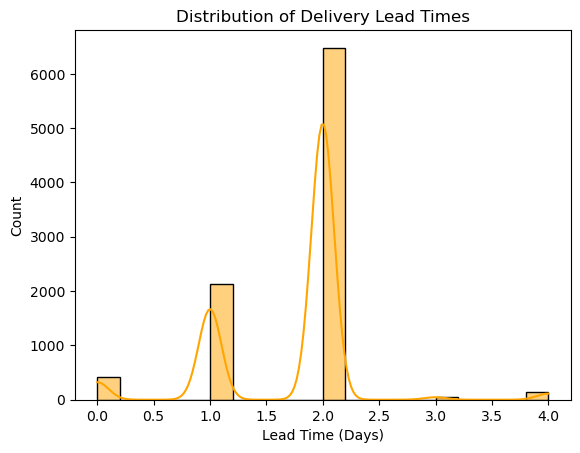

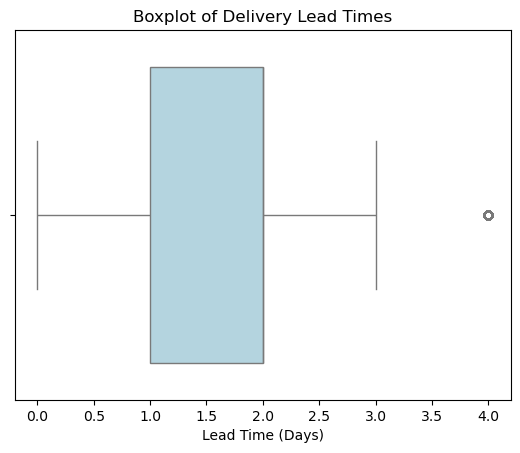

count    9215.000000
mean        1.717743
std         0.630500
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: TPT, dtype: float64
Skewness of TPT: -0.39


In [21]:
summary = df["TPT"].describe()
skew = df["TPT"].skew()

sns.histplot(df["TPT"], bins=20, kde=True, color='orange')
plt.title('Distribution of Delivery Lead Times')
plt.xlabel('Lead Time (Days)')
plt.show()

sns.boxplot(x=df["TPT"], color='lightblue')
plt.title('Boxplot of Delivery Lead Times')
plt.xlabel('Lead Time (Days)')
plt.show()

print(summary)
print(f"Skewness of TPT: {skew: .2f}")

Goal: Compare average lead times between two carrier types to evaluate supplier efficiency

Method:  Use Welch's t-test which is a statistical test that compares the means of two independent group. In this case, it is two carriers. Welch's test does not assume equal variances between two groups, making it more reliable when samples sizes differ. 

To measure the magnitude of of the difference, I also report a Cohen's d, which represents how large the difference is in practical terms. 

I compare delivery times between two suppliers to see if performance difference are statiscally significant. The Welch's t-test shows a statiscally difference in average lead tines between the two carriers (t =14.302, p < 0.001>). Since the p-value is below 0.05, this indicates the difference is very unlikely due to random chance. Carrier V44_3 delivers faster on average, about .7 days quicler, and Cohen's d of .69 confirms the effect is moderate to large, suggesting the differnece is practically meaningful. 

In [22]:
from scipy import stats

carrier_a = df[df["Carrier"] == "V444_0"]["TPT"]
carrier_b = df[df["Carrier"] == "V44_3"]["TPT"]

t_stat, p_value = stats.ttest_ind(carrier_a, carrier_b, equal_var=False)
mean_diff = carrier_a.mean() - carrier_b.mean()
cohen_d = mean_diff / \
    np.sqrt((carrier_a.std() ** 2 + carrier_b.std() ** 2) / 2)


print(f"T-Statistic: {t_stat: .3f}, P-Value: {p_value: .3f}")
print(f"Mean difference: {mean_diff: .2f}, cohen's d: {cohen_d: .2f}")

T-Statistic:  14.302, P-Value:  0.000
Mean difference:  0.71, cohen's d:  0.69


Goal: Test whether service level is associated with likelihood of late delivery 

Method: Use a Chi-square test of independence, which evaluates whether two categorical variables are statisically related. The variables are service level and late delivery for this analysis. 
If the p-value is less than 0.05, it means that delivery timeliness depends significantly on service level rather than chance. 
A bar plot of proportions (with 95% confidence intervals) was used to visualize the percentage of late vs. on-time deliveries for each service level. 

I test to see if certain levels are linked to a high chance of late delivery. The p-value <0.001 indicates a statiscally significant relationship between service level and likelihood of late delivery. The plot shows that all service levels have high on-time rates, but DTP shipments have slightly higher proportions of late deliveries compared to CRF and DTD. The chi-square test confirms that service level choice impacts delivery performance. While services like CRF and DTD maintain strong on-time rates, DTP's slightly higher delay rate suggest potential issues such as scheduling or regional constraints. 

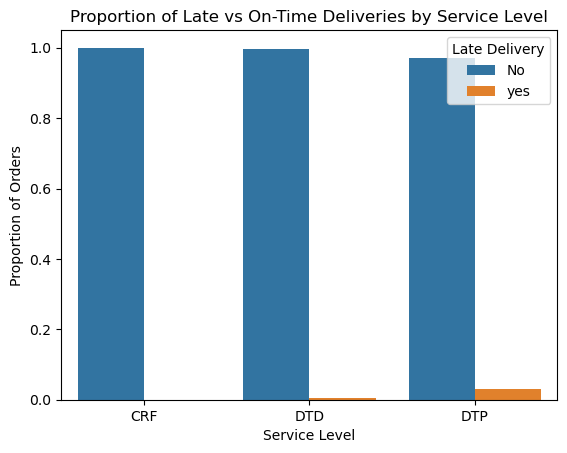

Chi-square =  69.76, p =  0.0000


In [23]:
df['Late Delivery'] = np.where(df['Ship Late Day count'] > 0, 'yes', 'No')

contingency = pd.crosstab(df['Service Level'], df['Late Delivery'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)


prop_df = df.groupby('Service Level')['Late Delivery'].value_counts(
    normalize=True).rename("Proportion").reset_index()
sns.barplot(data=prop_df, x='Service Level',
            y='Proportion', hue='Late Delivery', errorbar=('ci', 95))
plt.title('Proportion of Late vs On-Time Deliveries by Service Level')
plt.ylabel('Proportion of Orders')
plt.show()

print(f"Chi-square = {chi2: .2f}, p = {p: .4f}")

Goal: Asses whether larger order tend to weigh more

Method: Use a Pearson correlation, which measures the strength and direction of the linear relationship between two continours variables, unit quantity and weight. 
A Scatter plot with regression line and 95% confidence interval was created to visualize the trend. Pearsons r ranges from -1 to 1:
 - r > 0 indicates a positve relationship (as one increases, the other decreases)
 - r < 0 indicates a negative relationship
 - r ~= 0 means no linear relationship

I examined whether the order quantity is correlated with total shipment weight. A strong positive correlation would confirm that order size directly drives total shipment weight.The correlaion is positive and statiscally signifcant indicating that large orders do generally weight more. However, since r = .345 is moderate not strong, it suggest that order size can influence total shipment weight, but other factors such as item type also play a role. The relationship confirms that as order quantities increase, shipment weights also rise, but not perfectly linearly. 

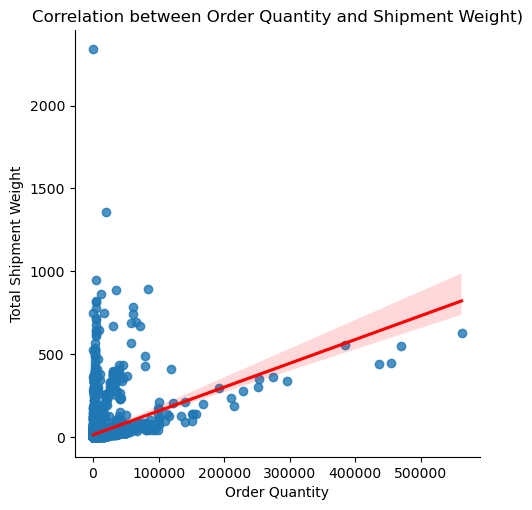

Pearson correlation coefficient:  0.345, p-value:  0.0000


In [24]:
from scipy.stats import pearsonr

r, p = pearsonr(df['Unit quantity'], df['Weight'])

sns.lmplot(data=df, x='Unit quantity',
           y='Weight', line_kws={'color': 'red'})
plt.title(f"Correlation between Order Quantity and Shipment Weight)")
plt.xlabel('Order Quantity')
plt.ylabel('Total Shipment Weight')
plt.show()
print(f"Pearson correlation coefficient: {r: .3f}, p-value: {p: .4f}")

Goal: Determine whether heavier shipments tend to have longer delivery times

Method: Use a Spearman correlation, which measures the strength and directtion of a monotonic relationship between two variables, weight per unit and TPT. I chose spearman for this instead of pearson because lead time data is non-normal.
A regression plot with a best-fit line to identify trends.

I assess whether heavier shipments tend to correspond with longer delivery times. The neagtive correlation indicates that heavier shipments tend to have slighly shorter delivery times, though the effect is small and weak. The weak but significant trend suggests that shipment weight has minimal impact on lead time, but when it does, heavier orders are no necessarily slower. 


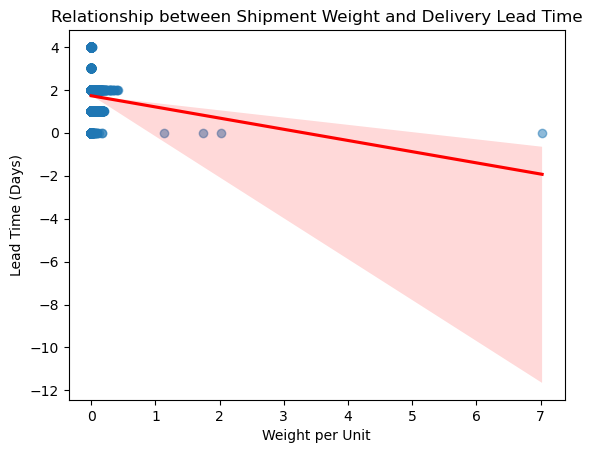

Spearman correlation: -0.15, p-value:  0.0000


In [25]:
from scipy.stats import spearmanr

corr, p = spearmanr(df['TPT'], df['Weight per Unit'])


sns.regplot(
    data=df,
    x='Weight per Unit',
    y='TPT',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Relationship between Shipment Weight and Delivery Lead Time')
plt.xlabel('Weight per Unit')
plt.ylabel('Lead Time (Days)')
plt.show()
print(f"Spearman correlation: {corr: .2f}, p-value: {p: .4f}")

## Conlusion

The project analyzed a stimulated supply chain dataset to identify operational patterns, supplier performance differences, and cost-effciency trends through visual and statistical techiques. Across the visualization and statistical tests, here are some of the key findings that emerged: 

    - Delivery lead times were tighly clustered around 1-2 days, with minimal outliers. This shows the system performs consistently. 
    - Supplier performance differed significantly, one carrier exhibited longer average lead time, which was confirmed through Welch's t-test
    -Service level reliability was strongly associated with late deliveres, showing some services are more dependable. 
    - Order quantity and shipment weight showed a positive correlation, confirming that larger orders predict hevier total shipments.
    - Shipment weight and delivery were weakly negatively correlated, suggesting heavier shipments are handled efficiently rather than more slowly. 

Here are the answers to the questions I had set before starting the analysis:
    - Which suppliers have the highest average lead time and shippning costs?
        One carrier (V444_0) had significantly higher average lead times compared to V44_3. This suggests that supplier performance differences are real and measureable, identifying which supplier contributes most to slow deliveries.

    - Is there a measureable relationship between order quantity and total shipping cost?
        There was a moderate positive correlation between order size and shipment weight. This implies larger orders tend to weigh more, but shipping cost per unit may not decrease proportionally.

    - How do delivery times vary across different regions or transport modes?
        Regional data showed varaiation in average costs across carriers, while chi-square test confirmed some service levels experience fewer late deliveries. This indicates that service type and regional logistics affect delivery reliability and performance. 

    - What trends exist in total delivery volumes and average shipping costs over time?
        The dataset only contained one date, preventing time-based trend analysis. However, a carrier trend comparison was used a valid alternative to show operational volume distribution across suppliers.

    - Do busier warehouses have higher operating costs?
        The boxplot showed no consistent increase in cost with capacity group, meaning busier warehouses do not necessarily cost more per unit handled 


Overall, the analysis indicates that supplier performance and service level choice are the most influential factors affecting delivery outcomes, while warehouse operations and shipment characteristics play smaller but measureable roles. These insights can help supply chain managers improve carrier selection, service reliability, and cost forecasting for more eficient logistics planning. 

## Appendix

Data source
 - data used, SupplyChain.xlsx, is a simulated educational dataset.

Python libraries Used
 - pandas (for data manipulation and cleaning)
 - numpy (for numerical computation and handling missing values)
 - matplotlib and seaborn (for data visualization and plotting)
 - spicy.stats (for statistical hypothesis testing)
 - plotly.express (for creating interactive visualizations)

Statistical Methods
 - descriptive stats - mean, median, std, and skewness
 - welch's t-test - to compare mean delivery times between suppliers with unequal variances
 - chi-square - to test association between service level and late delivery frequency
 - pearson correlation - to measure the linear relationship between order quantity and shipment weight
 - spearman correlation - to assess monotonic relationships between shipment weight and delivery time

 References
 - https://seaborn.pydata.org/
 - https://plotly.com/python/plotly-express/
 - https://docs.scipy.org/doc/scipy/reference/stats.html
 

